✅ scaler.pkl saved

===== Logistic Regression =====
Accuracy: 0.8032786885245902
ROC AUC: 0.8157327586206896
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81        32
           1       0.77      0.83      0.80        29

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



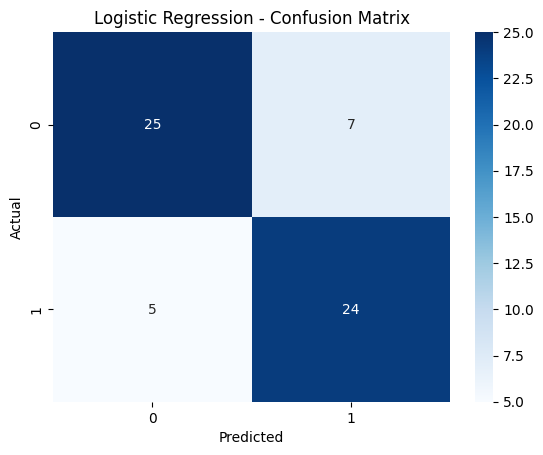

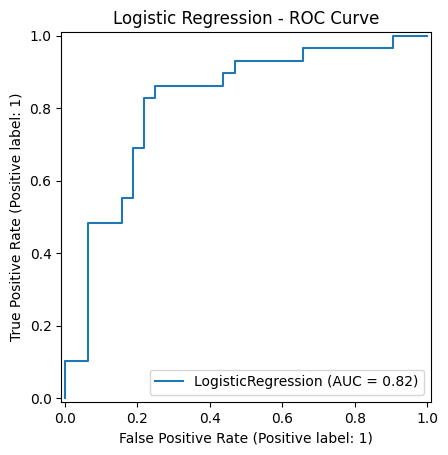


===== KNN =====
Accuracy: 0.7704918032786885
ROC AUC: 0.8421336206896552
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77        32
           1       0.73      0.83      0.77        29

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



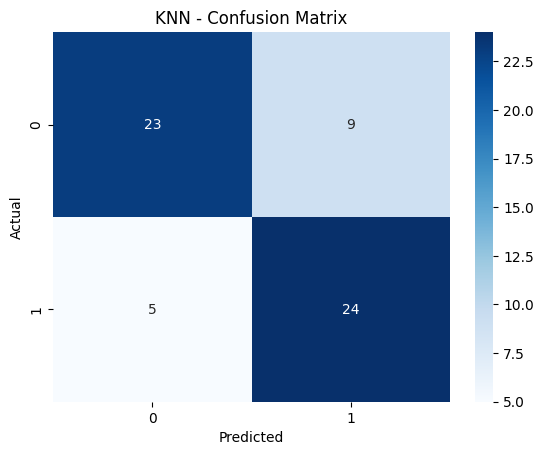

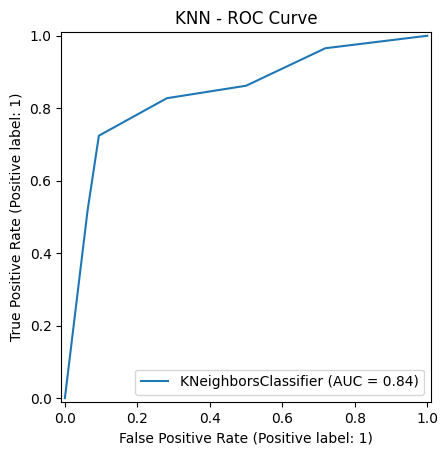


===== Random Forest =====
Accuracy: 0.8032786885245902
ROC AUC: 0.8599137931034483
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



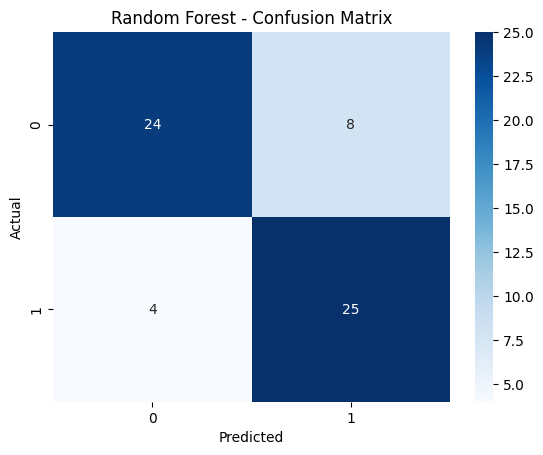

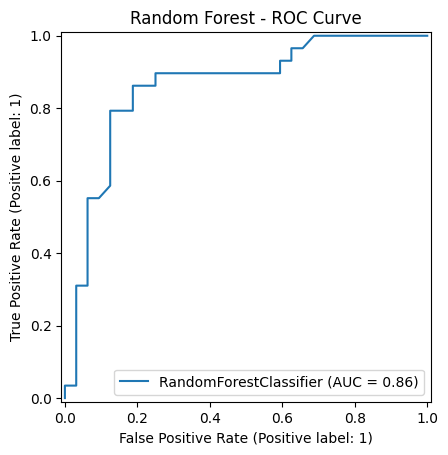


===== SVM =====
Accuracy: 0.8032786885245902
ROC AUC: 0.84375
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



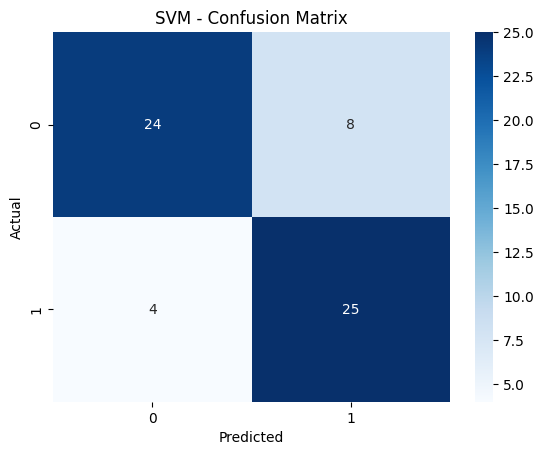

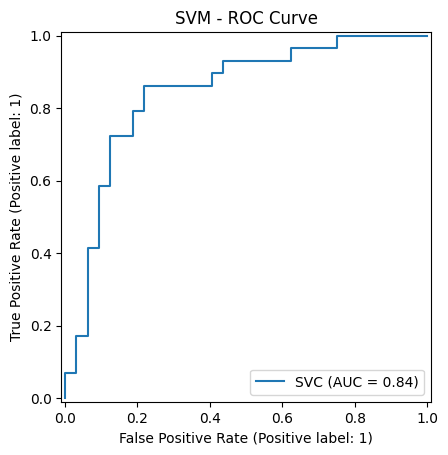


🔍 Model Comparison:

                 Model  Accuracy   ROC AUC
2        Random Forest  0.803279  0.859914
3                  SVM  0.803279  0.843750
1                  KNN  0.770492  0.842134
0  Logistic Regression  0.803279  0.815733

✅ Saved best model: Random Forest


In [8]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 2. Load processed data
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv').values.ravel()
y_test = pd.read_csv('../data/y_test.csv').values.ravel()

# 3. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 💾 Save scaler for use in Flask
joblib.dump(scaler, "../models/scaler.pkl")
print("✅ scaler.pkl saved")

# 4. Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}

# 5. Train and evaluate each model
results = []

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)
    print("Accuracy:", acc)
    print("ROC AUC:", roc)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC curve
    RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.title(f"{name} - ROC Curve")
    plt.show()

    # Store results
    results.append((name, acc, roc))

# 6. Summary comparison
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "ROC AUC"])
print("\n🔍 Model Comparison:\n")
print(results_df.sort_values(by="ROC AUC", ascending=False))

# 7. Save best model
best_model_name = results_df.sort_values(by="ROC AUC", ascending=False).iloc[0]['Model']
best_model = models[best_model_name]
joblib.dump(best_model, f"../models/{best_model_name.replace(' ', '_').lower()}_model.pkl")
print(f"\n✅ Saved best model: {best_model_name}")


In [7]:
import pandas as pd
import json

# Correct relative path from root
X_train = pd.read_csv("../data/X_train.csv")

columns = list(X_train.columns)

# Save into the same data/ folder
with open("../data/columns.json", "w") as f:
    json.dump(columns, f)

print("✅ columns.json saved to data/columns.json")


✅ columns.json saved to data/columns.json
